Reglas generales:

1. Cada columna de valores, tiene una correspondiente columna de calidad
2. Si el valor es -9999, se considera valor faltante
3. Si la CALIDAD del valor es mayor a 4, se considera valor faltante

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

In [324]:
df=pd.read_csv('datos_crudos/28.csv')

In [325]:
# # Replace the first column name
# df.columns.values[0] = 'Fecha_Hora'

# Descarte de filas con calidad baja

In [326]:
df.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [327]:
# Drop the codigoSerial column
df.drop('codigoSerial', axis=1, inplace=True)

In [328]:
# Replace -9999 with NaN
df.replace(-9999, pd.NA, inplace=True)

In [329]:
# Get the percentage of missing values by column
missing_values = df.isnull().mean() * 100

In [330]:
# Drop columns with more than 10% missing values
columns_to_drop = missing_values[missing_values > 10].index

df.drop(columns_to_drop, axis=1, inplace=True)

In [331]:
# There are two types of columns: those with measurements and those with values for the quality of the measurements.
# The columns with values for the quality of the measurements have the same name as the columns with the measurements, but with the prefix 'calidad_'.
# If the dataset has only the columns with the quality of the measurements, but not the columns with the measurements, then the columns with the quality of the measurements are dropped.

# Get the columns with measurements
columns_with_measurements = df.columns[~df.columns.str.startswith('calidad_')]

# Get the columns with the quality of the measurements
columns_with_quality = df.columns[df.columns.str.startswith('calidad_')]

# Find the columns with quality of the measurements that have a corresponding column with measurements
columns_with_quality_and_measurements = columns_with_quality.str.replace('calidad_', '').isin(columns_with_measurements)

# Drop the columns with the quality of the measurements that do not have a corresponding column with measurements
columns_with_quality_to_drop = columns_with_quality[~columns_with_quality_and_measurements]

df.drop(columns_with_quality_to_drop, axis=1, inplace=True)

In [332]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [333]:
df.shape

(62112, 21)

In [334]:
df.isna().sum()

Fecha_Hora                0
pm25                    656
calidad_pm25             12
no                     1750
calidad_no               12
no2                    1750
calidad_no2              12
nox                    1750
calidad_nox              12
dviento_ssr            2429
calidad_dviento_ssr      12
haire10_ssr            2362
calidad_haire10_ssr      12
p_ssr                  2362
calidad_p_ssr            12
rglobal_ssr            2434
calidad_rglobal_ssr      12
taire10_ssr            2362
calidad_taire10_ssr      12
vviento_ssr            2363
calidad_vviento_ssr      12
dtype: int64

In [335]:
df

,Fecha_Hora,pm25,calidad_pm25,no,calidad_no,no2,calidad_no2,nox,calidad_nox,dviento_ssr,...,haire10_ssr,calidad_haire10_ssr,p_ssr,calidad_p_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2018-01-01 00:00:00,42.0,1.0,22.8438,1.0,16.5963,1.0,39.4463,1.0,6.92989,...,74.9315,1.0,637.431,1.0,0.0,1.0,19.171,1.0,0.560345,1.0
1,2018-01-01 01:00:00,38.0,1.0,2.6975,1.0,13.4904,1.0,16.189,1.0,323.503,...,77.5025,1.0,636.948,1.0,0.0,1.0,18.6489,1.0,1.20548,1.0
2,2018-01-01 02:00:00,53.0,1.0,4.72986,1.0,15.2611,1.0,19.9911,1.0,331.834,...,78.9618,1.0,636.518,1.0,0.0,1.0,18.2408,1.0,1.11856,1.0
3,2018-01-01 03:00:00,38.0,1.0,3.08167,1.0,13.7399,1.0,16.8242,1.0,324.642,...,79.5796,1.0,636.347,1.0,0.0,1.0,17.8762,1.0,0.721186,1.0
4,2018-01-01 04:00:00,47.0,1.0,5.62889,1.0,15.2401,1.0,20.8768,1.0,1.63179,...,79.2826,1.0,636.0,1.0,0.0,1.0,17.8206,1.0,0.122182,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,2025-01-31 19:00:00,11.0,1.0,2.9547,1.0,16.8103,1.0,19.765,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62108,2025-01-31 20:00:00,13.0,1.0,4.057,2.6,19.625,2.6,23.6821,2.6,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62109,2025-01-31 21:00:00,22.0,1.0,5.3826,1.0,20.8798,1.0,26.2625,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31
62110,2025-01-31 22:00:00,40.0,1.0,3.1054,1.0,14.8933,1.0,17.9987,1.0,<NA>,...,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31,<NA>,4.31


In [336]:
df_pm25=df[['Fecha_Hora','pm25', 'calidad_pm25']]

In [337]:
df_pm25[df_pm25['calidad_pm25']>=4]

,Fecha_Hora,pm25,calidad_pm25
109,2018-01-05 13:00:00,<NA>,4.31
188,2018-01-08 20:00:00,<NA>,4.31
189,2018-01-08 21:00:00,<NA>,4.31
190,2018-01-08 22:00:00,<NA>,4.31
191,2018-01-08 23:00:00,<NA>,4.31
...,...,...,...
62049,2025-01-29 09:00:00,<NA>,4.31
62050,2025-01-29 10:00:00,<NA>,4.31
62051,2025-01-29 11:00:00,<NA>,4.31
62052,2025-01-29 12:00:00,<NA>,4.31


In [338]:
# Summarize the data
df.describe()

,Fecha_Hora,pm25,calidad_pm25,no,calidad_no,no2,calidad_no2,nox,calidad_nox,dviento_ssr,...,haire10_ssr,calidad_haire10_ssr,p_ssr,calidad_p_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
count,62112,61456.0,62100.0,60362.0,62100.0,60362.0,62100.0,60362.0,62100.0,59683.0,...,59750.0,62100.0,59750.0,62100.0,59678.0,62100.0,59750.0,62100.0,59749.0,62100.0
unique,62112,154.0,14.0,55326.0,11.0,55043.0,11.0,57292.0,11.0,15520.0,...,12926.0,6.0,4530.0,7.0,24321.0,6.0,11741.0,6.0,12401.0,6.0
top,2025-01-31 07:00:00,17.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-9990.0,1.0,636.4,1.0,0.0,1.0,18.9,1.0,0.1,1.0
freq,1,2908.0,58640.0,108.0,41082.0,107.0,43310.0,107.0,43067.0,1686.0,...,469.0,59229.0,2359.0,58036.0,25538.0,59175.0,699.0,58624.0,4672.0,55548.0


In [339]:
# Percentage of data with 'pm25' = -9999
(df['pm25'] == -9999).sum() / len(df) * 100

np.float64(0.0)

In [340]:
# Group data by 'calidad_pm25', count the number of records and show as percentage of total
df_grouped=df.groupby('calidad_pm25').size().reset_index(name='counts')

df_grouped['percentage'] = df_grouped['counts']/df_grouped['counts'].sum()*100

In [341]:
df_grouped

,calidad_pm25,counts,percentage
0,1.0000,58640,94.428341
1,2.0000,48,0.077295
2,2.1000,418,0.673108
3,2.2000,276,0.444444
4,2.3000,828,1.333333
5,2.4000,19,0.030596
6,2.5000,69,0.111111
7,3.0000,110,0.177134
8,3.1000,653,1.051530
9,3.2000,15,0.024155


In [342]:
#elegir las columnas del analisis, en si los datos que se van a usar y no la calidad de los datos
columnas_filtradas= [col for col in df.columns if "calidad" not in col]
df_nuevo = df[columnas_filtradas]

In [343]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'],
      dtype='object')

# Llenado de nulos

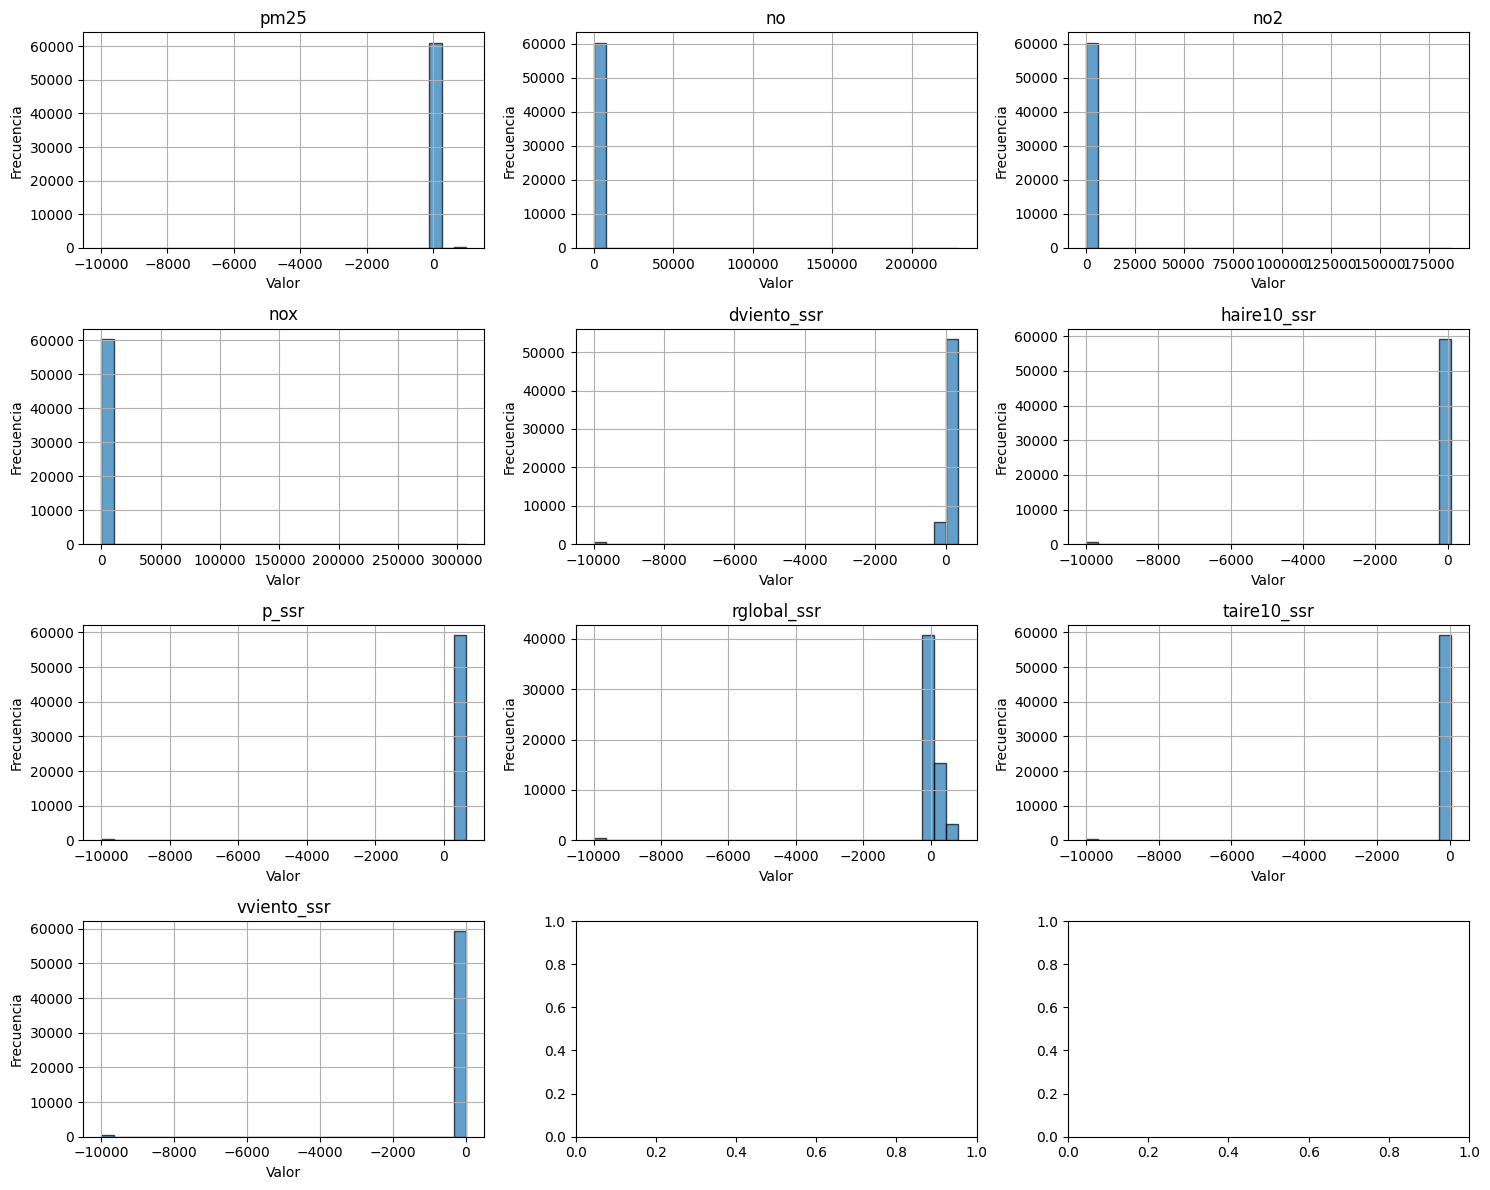

In [344]:
import matplotlib.pyplot as plt

# Definir las columnas que queremos visualizar (excluyendo 'Fecha_Hora' ya que es una fecha)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Crear una figura con subgráficos (ajustar tamaño según cantidad de variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # 4 filas, 3 columnas

# Aplanar la matriz de ejes para iterar sobre ella fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(variables):
    if i < len(variables):  # Evitar errores si hay menos variables que subgráficos
        df_nuevo[col].dropna().astype(float).hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

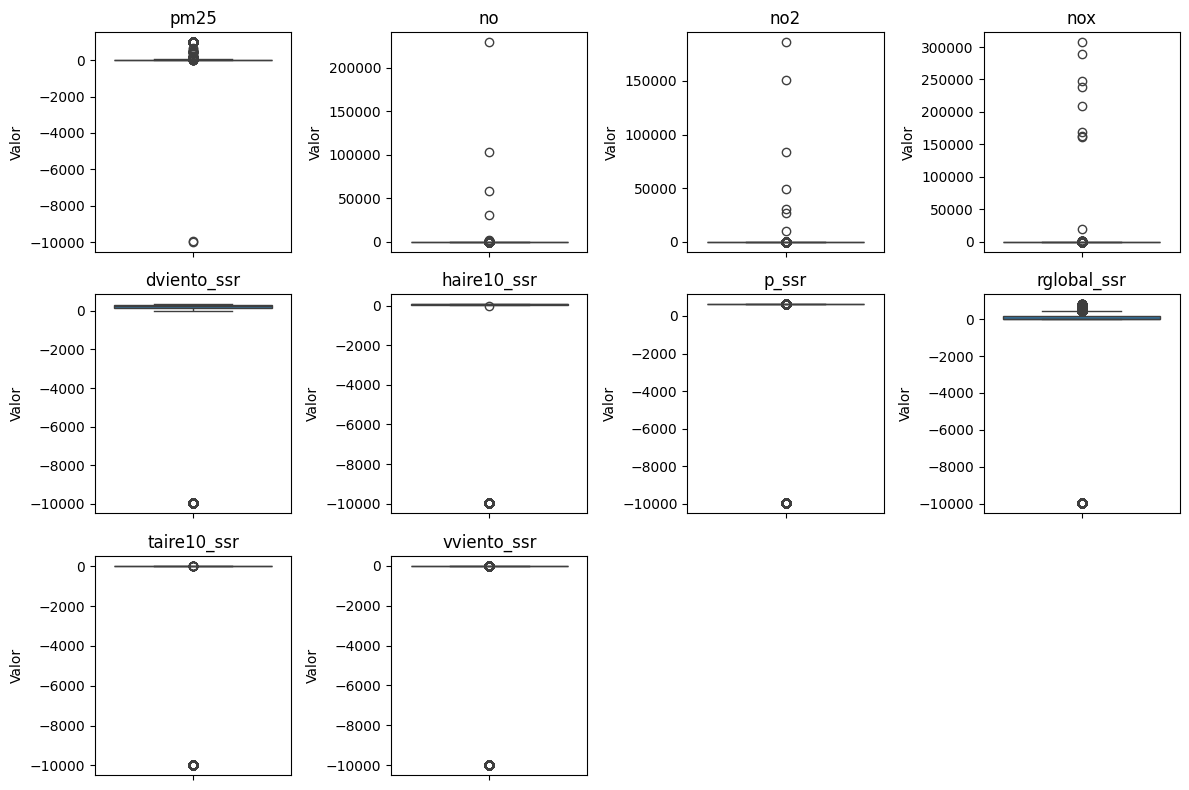

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas (excluyendo Fecha_Hora)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Organiza en una cuadrícula
    sns.boxplot(y=df_nuevo[col])  
    plt.title(col)  # Título con el nombre de la variable
    plt.ylabel('Valor')

plt.tight_layout()  # Ajusta el diseño para evitar sobreposición
plt.show()

In [241]:
#hacer

df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])

# Crear columnas de año y mes
df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
df_nuevo['Mes'] = df_nuevo['Fecha_Hora'].dt.month

# Calcular el promedio de pm25 para cada mes, excluyendo valores <= 0
promedios_pm25 = df_nuevo[(df_nuevo['pm25'] > 0) & (df_nuevo['pm25']<80)].groupby(['Año', 'Mes'])['pm25'].mean()

# Función para reemplazar valores de pm25
def reemplazar_pm25(row):
    if pd.isna(row['pm25']) or row['pm25'] <= 0 or row['pm25']>40 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_pm25.get((row['Año'], row['Mes']), row['pm25'])
    return row['pm25']

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\1330214401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\1330214401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\1330214401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [242]:
# Aplicar la función
df_nuevo['pm25'] = df_nuevo.apply(reemplazar_pm25, axis=1)

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3504103422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['pm25'] = df_nuevo.apply(reemplazar_pm25, axis=1)


In [243]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes'],
      dtype='object')

In [244]:
df_nuevo[df_nuevo['pm25']<=0]

,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


In [245]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Hora   62112 non-null  datetime64[ns]
 1   pm25         62112 non-null  float64       
 2   no           60362 non-null  object        
 3   no2          60362 non-null  object        
 4   nox          60362 non-null  object        
 5   dviento_ssr  59683 non-null  object        
 6   haire10_ssr  59750 non-null  object        
 7   p_ssr        59750 non-null  object        
 8   rglobal_ssr  59678 non-null  object        
 9   taire10_ssr  59750 non-null  object        
 10  vviento_ssr  59749 non-null  object        
 11  Año          62112 non-null  int32         
 12  Mes          62112 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 5.7+ MB


count    61363.000000
mean        20.628796
std          9.164549
min          0.500000
25%         14.000000
50%         20.000000
75%         27.000000
90%         34.000000
95%         36.000000
99%         40.000000
max         47.638028
Name: pm25, dtype: float64

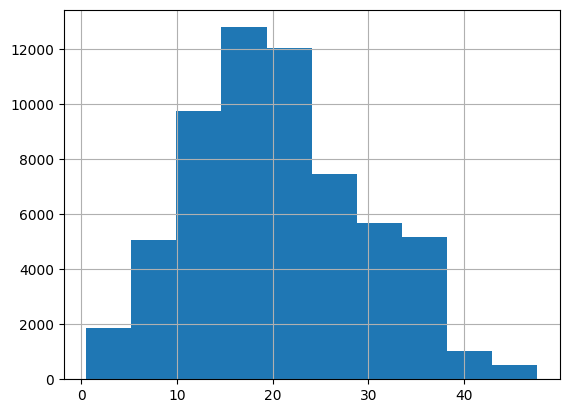

In [299]:
df_nuevo['pm25'].dropna().astype(float)[df_nuevo['pm25']<125].hist()
df_nuevo['pm25'].dropna().astype(float).describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count     60362.000000
mean         22.606775
std        1058.115315
min         -21.164900
25%           3.130775
50%           8.271700
75%          21.944500
90%          39.960110
95%          52.057680
99%          77.553429
max      229377.000000
Name: no, dtype: float64

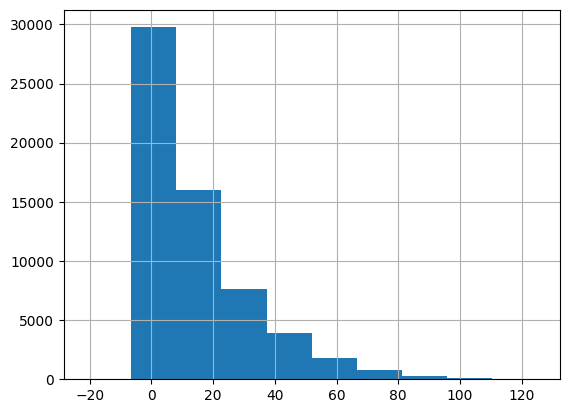

In [246]:
df_nuevo['no'].dropna().astype(float)[df_nuevo['no']<125].hist()
df_nuevo['no'].dropna().astype(float).describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [247]:
# Calcular el promedio de no para cada mes, excluyendo valores <= 0
promedios_no = df_nuevo[(df_nuevo['no'] > 0) & (df_nuevo['no'] < 1000) ].groupby(['Año', 'Mes'])['no'].mean()

# Función para reemplazar valores de no
def reemplazar_no(row):
    if pd.isna(row['no']) or row['no'] <= 0 or row['no'] > 120:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no.get((row['Año'], row['Mes']), row['no'])
    return row['no']

In [248]:
# Aplicar la función
for i in range(0,4):
    df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\485776063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\485776063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\485776063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [249]:
#comprobación
df_nuevo['no'].describe()

count    62112.000000
mean        15.792672
std         16.873548
min          0.000694
25%          3.799175
50%          9.658800
75%         22.196925
max        119.885000
Name: no, dtype: float64

count     60362.000000
mean         25.162279
std        1064.763963
min         -19.282600
25%           9.648050
50%          15.289250
75%          21.561300
90%          28.613910
95%          33.536710
98%          39.716814
max      186048.000000
Name: no2, dtype: float64

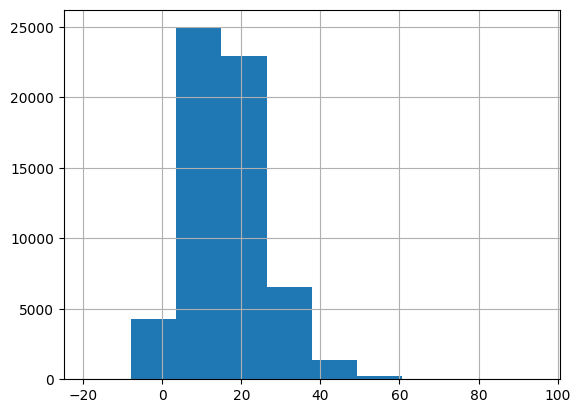

In [250]:
df_nuevo['no2'].dropna().astype(float)[df_nuevo['no2']<100].hist()
# Show 90th percentile
df_nuevo['no2'].dropna().astype(float).describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98])

In [251]:
# Calcular el promedio de no2 para cada mes, excluyendo valores <= 0
promedios_no2 = df_nuevo[(df_nuevo['no2'] > 0) & (df_nuevo['no2'] < 50)].groupby(['Año', 'Mes'])['no2'].mean()

# Función para reemplazar valores de pm25
def reemplazar_no2(row):
    if pd.isna(row['no2']) or row['no2'] <= 0 or row['no2'] > 75:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no2.get((row['Año'], row['Mes']), row['no2'])
    return row['no2']

In [252]:
promedios_no2.info()

<class 'pandas.core.series.Series'>
MultiIndex: 85 entries, (np.int32(2018), np.int32(1)) to (np.int32(2025), np.int32(1))
Series name: no2
Non-Null Count  Dtype 
--------------  ----- 
85 non-null     object
dtypes: object(1)
memory usage: 1.0+ KB


In [253]:
# Aplicar la función
for i in range(0,4):
    df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3448688741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3448688741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3448688741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [254]:
df_nuevo['no2'].unique()

array([16.5963, 13.4904, 15.2611, ..., 20.8798, 14.8933, 12.8658])

In [255]:
print(df_nuevo['no2'].isna().sum())

0


In [256]:
df_nuevo[df_nuevo['no2']<=0]

,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


count     60362.000000
mean         61.808253
std        2643.192293
min          -7.358900
25%          16.175600
50%          26.059750
75%          41.841675
90%          61.379820
95%          74.333030
99%         102.383530
max      307230.000000
Name: nox, dtype: float64

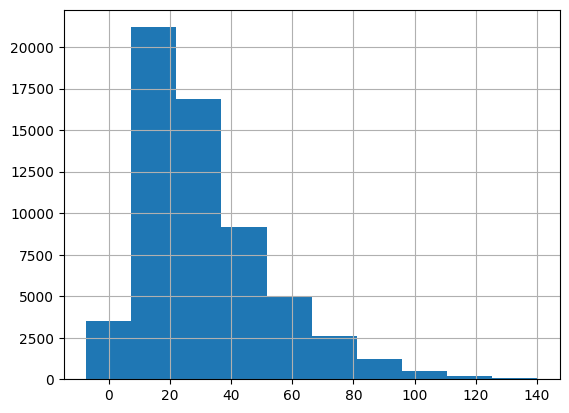

In [257]:
df_nuevo['nox'].dropna().astype(float)[df_nuevo['nox']<140].hist()
df_nuevo['nox'].dropna().astype(float).describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [258]:
# Calcular el promedio de nox para cada mes, excluyendo valores <= 0
promedios_nox = df_nuevo[(df_nuevo['nox'] > 0)&(df_nuevo['nox'] < 100)].groupby(['Año', 'Mes'])['nox'].mean()

# Función para reemplazar valores de nox
def reemplazar_nox(row):
    if pd.isna(row['nox']) or row['nox'] <= 0 or row['nox'] > 105:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_nox.get((row['Año'], row['Mes']), row['nox'])
    return row['nox']

In [259]:
for i in range(0,4):
    df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)

df_nuevo[df_nuevo['nox']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3171260737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3171260737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3171260737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


In [260]:
df_nuevo['nox'].describe()

count    62112.000000
mean        31.012193
std         19.524100
min          0.007500
25%         16.695725
50%         26.426850
75%         40.894225
max        104.991000
Name: nox, dtype: float64

count    59683.000000
mean       125.015967
std        982.499634
min      -9993.000000
25%        130.614000
50%        231.000000
75%        329.823500
max        360.000000
Name: dviento_ssr, dtype: float64

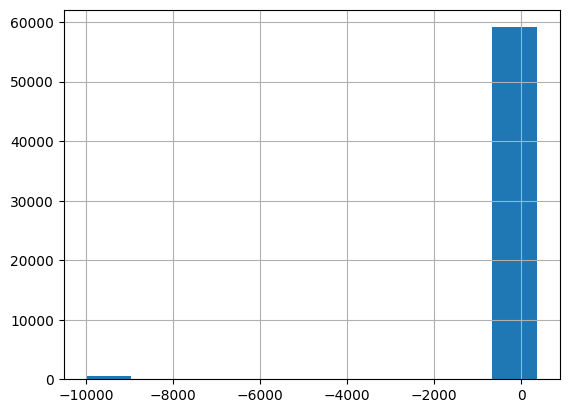

In [261]:
df_nuevo['dviento_ssr'].dropna().astype(float).hist()
df_nuevo['dviento_ssr'].dropna().astype(float).describe()

In [262]:
# Calcular el promedio de dviento_ssr para cada mes, excluyendo valores <= 0
promedios_dviento_ssr = df_nuevo[(df_nuevo['dviento_ssr'] > 0) & (df_nuevo['dviento_ssr'] < 0)].groupby(['Año', 'Mes'])['dviento_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_dviento_ssr(row):
    if pd.isna(row['dviento_ssr']) or row['dviento_ssr'] <= -360 or row['dviento_ssr'] > 360 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_nox.get((row['Año'], row['Mes']), row['dviento_ssr'])
    return row['dviento_ssr']

In [263]:
for i in range(0,4):
    df_nuevo['dviento_ssr'] = df_nuevo.apply(reemplazar_dviento_ssr, axis=1)

df_nuevo[df_nuevo['dviento_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\2471272576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['dviento_ssr'] = df_nuevo.apply(reemplazar_dviento_ssr, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\2471272576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['dviento_ssr'] = df_nuevo.apply(reemplazar_dviento_ssr, axis=1)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\2471272576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes
6650,2018-10-05 02:00:00,32.0,31.6652,35.409900,67.0751,0.0,85.8736,635.648,0.0,17.4905,0.0,2018,10
6798,2018-10-11 06:00:00,20.0,15.3217,19.998500,35.3201,0.0,87.611,636.323,0.0,16.7687,0.0,2018,10
7414,2018-11-05 22:00:00,12.0,30.5468,21.490100,52.0368,0.0,84.0939,636.75,0.061111,17.8069,0.0,2018,11
27483,2021-02-19 03:00:00,11.0,33.1301,7.543741,31.6236,0.0,85.3,636.1,0.0,16.9,0.0,2021,2
28274,2021-03-24 02:00:00,4.0,45.1713,6.903800,52.0750,0.0,86.5,636.4,0.0,16.7,0.0,2021,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61342,2024-12-30 22:00:00,27.0,45.5914,8.649900,54.2413,0.0,81.2,636.3,0.0,18.9,0.0,2024,12
61343,2024-12-30 23:00:00,23.0,45.7569,7.812800,53.5697,0.0,80.7,636.4,0.0,19.0,0.0,2024,12
61344,2024-12-31 00:00:00,33.0,31.2630,7.917000,39.1800,0.0,79.0,636.2,0.0,19.2,0.0,2024,12
61345,2024-12-31 01:00:00,15.0,21.2421,5.634000,26.8761,0.0,80.1,635.7,0.0,19.0,0.0,2024,12


In [264]:
df_nuevo['dviento_ssr'].describe()

count    62112.000000
mean       210.019365
std        121.930850
min          0.000000
25%        102.303750
50%        225.300000
75%        328.694000
max        360.000000
Name: dviento_ssr, dtype: float64

count    59750.000000
mean       -20.880984
std        916.840865
min      -9993.000000
25%         50.500000
50%         67.500000
75%         76.431775
max         88.349900
Name: haire10_ssr, dtype: float64

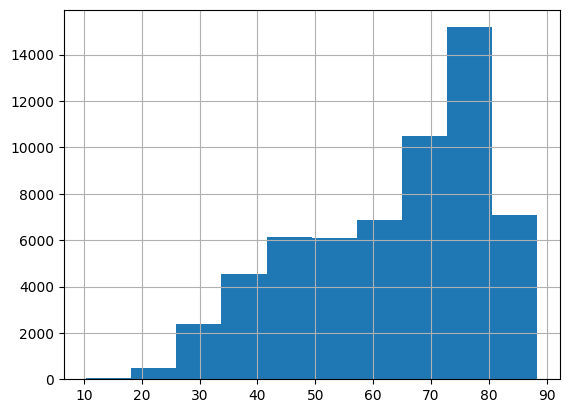

In [265]:
df_nuevo['haire10_ssr'].dropna().astype(float)[(df_nuevo['haire10_ssr']>0) & (df_nuevo['haire10_ssr']<200)].hist()
df_nuevo['haire10_ssr'].dropna().astype(float).describe()

In [266]:
# Calcular el promedio de haire10_ssr para cada mes, excluyendo valores <= 0
promedios_haire10_ssr = df_nuevo[df_nuevo['haire10_ssr'] > 0].groupby(['Año', 'Mes'])['haire10_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_haire10_ssr(row):
    if pd.isna(row['haire10_ssr']) or row['haire10_ssr'] <= 0 or row['haire10_ssr'] > 100:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_haire10_ssr.get((row['Año'], row['Mes']), row['haire10_ssr'])
    return row['haire10_ssr']

df_nuevo['haire10_ssr'] = df_nuevo.apply(reemplazar_haire10_ssr, axis=1)

df_nuevo[df_nuevo['haire10_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\466251847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['haire10_ssr'] = df_nuevo.apply(reemplazar_haire10_ssr, axis=1)


,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


count    59750.000000
mean       546.401587
std        968.869560
min      -9993.000000
25%        634.600000
50%        635.600000
75%        636.400000
max        639.400000
Name: p_ssr, dtype: float64

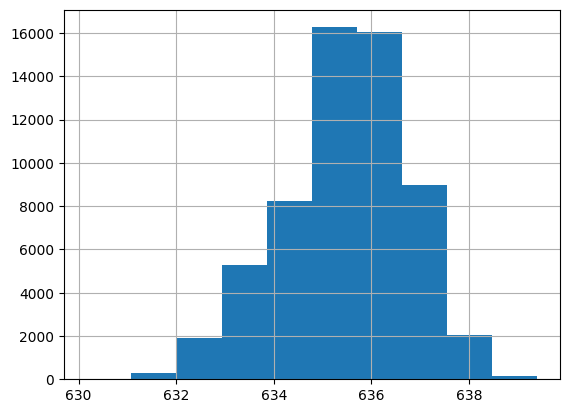

In [267]:
df_nuevo['p_ssr'].dropna().astype(float)[df_nuevo['p_ssr']>0].hist()
df_nuevo['p_ssr'].dropna().astype(float).describe()

In [268]:
# Calcular el promedio de p_ssr para cada mes, excluyendo valores <= 0
promedios_p_ssr = df_nuevo[df_nuevo['p_ssr'] > 0].groupby(['Año', 'Mes'])['p_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_p_ssr(row):
    if pd.isna(row['p_ssr']) or row['p_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_p_ssr.get((row['Año'], row['Mes']), row['p_ssr'])
    return row['p_ssr']

df_nuevo['p_ssr'] = df_nuevo.apply(reemplazar_p_ssr, axis=1)

df_nuevo[df_nuevo['p_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\955748770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['p_ssr'] = df_nuevo.apply(reemplazar_p_ssr, axis=1)


,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


count    59678.000000
mean        20.188694
std        935.479908
min      -9993.000000
25%          0.000000
50%          1.770000
75%        166.355000
max        822.719000
Name: rglobal_ssr, dtype: float64

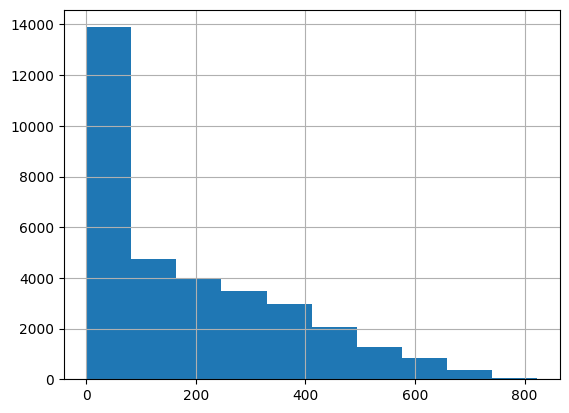

In [269]:
df_nuevo['rglobal_ssr'].dropna().astype(float)[df_nuevo['rglobal_ssr']>0].hist()
df_nuevo['rglobal_ssr'].dropna().astype(float).describe()

In [270]:
# Calcular el promedio de rglobal_ssr para cada mes, excluyendo valores <= 0
promedios_rglobal_ssr = df_nuevo[df_nuevo['rglobal_ssr'] >= 0].groupby(['Año', 'Mes'])['rglobal_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_rglobal_ssr(row):
    if pd.isna(row['rglobal_ssr']) or row['rglobal_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_rglobal_ssr.get((row['Año'], row['Mes']), row['rglobal_ssr'])
    return row['rglobal_ssr']

df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)

df_nuevo[df_nuevo['rglobal_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\737068996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)


,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


count    59750.000000
mean       -61.932929
std        912.935014
min      -9993.000000
25%         19.200000
50%         21.200000
75%         24.500000
max         33.400000
Name: taire10_ssr, dtype: float64

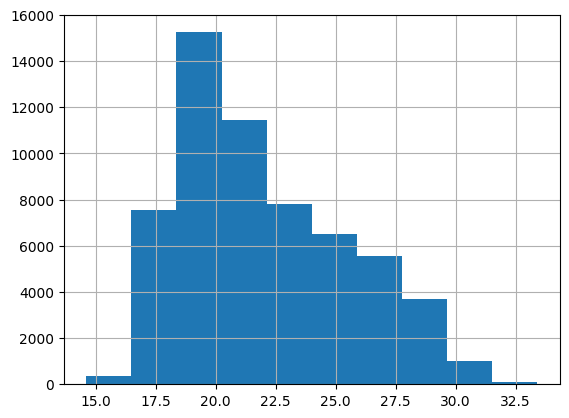

In [271]:
df_nuevo['taire10_ssr'].dropna().astype(float)[df_nuevo['taire10_ssr']>0].hist()
df_nuevo['taire10_ssr'].dropna().astype(float).describe()

In [272]:
# Calcular el promedio de taire10_ssr para cada mes, excluyendo valores <= 0
promedios_taire10_ssr = df_nuevo[df_nuevo['taire10_ssr'] > 0].groupby(['Año', 'Mes'])['taire10_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_taire10_ssr(row):
    if pd.isna(row['taire10_ssr']) or row['taire10_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_taire10_ssr.get((row['Año'], row['Mes']), row['taire10_ssr'])
    return row['taire10_ssr']

df_nuevo['taire10_ssr'] = df_nuevo.apply(reemplazar_taire10_ssr, axis=1)

df_nuevo[df_nuevo['taire10_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\1605154430.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['taire10_ssr'] = df_nuevo.apply(reemplazar_taire10_ssr, axis=1)


,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


count    59749.000000
mean       -83.006966
std        910.998493
min      -9993.000000
25%          0.200000
50%          0.600000
75%          1.100000
max          4.493070
Name: vviento_ssr, dtype: float64

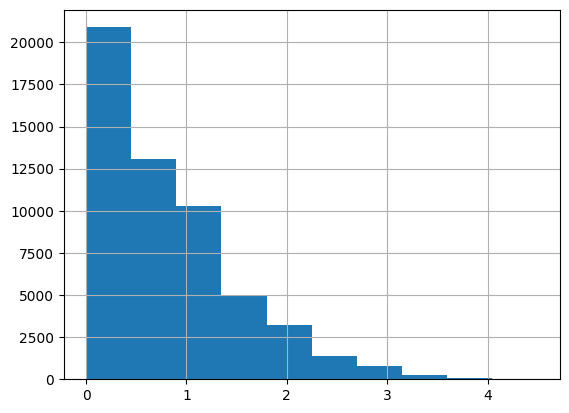

In [273]:
df_nuevo['vviento_ssr'].dropna().astype(float)[df_nuevo['vviento_ssr']>0].hist()
df_nuevo['vviento_ssr'].dropna().astype(float).describe()

In [274]:
# Calcular el promedio de vviento_ssr para cada mes, excluyendo valores <= 0
promedios_vviento_ssr = df_nuevo[df_nuevo['vviento_ssr'] >= 0].groupby(['Año', 'Mes'])['vviento_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_vviento_ssr(row):
    if pd.isna(row['vviento_ssr']) or row['vviento_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_vviento_ssr.get((row['Año'], row['Mes']), row['vviento_ssr'])
    return row['vviento_ssr']

df_nuevo['vviento_ssr'] = df_nuevo.apply(reemplazar_vviento_ssr, axis=1)

df_nuevo[df_nuevo['vviento_ssr']<=0]

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\1400337466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['vviento_ssr'] = df_nuevo.apply(reemplazar_vviento_ssr, axis=1)


,Fecha_Hora,pm25,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,Año,Mes


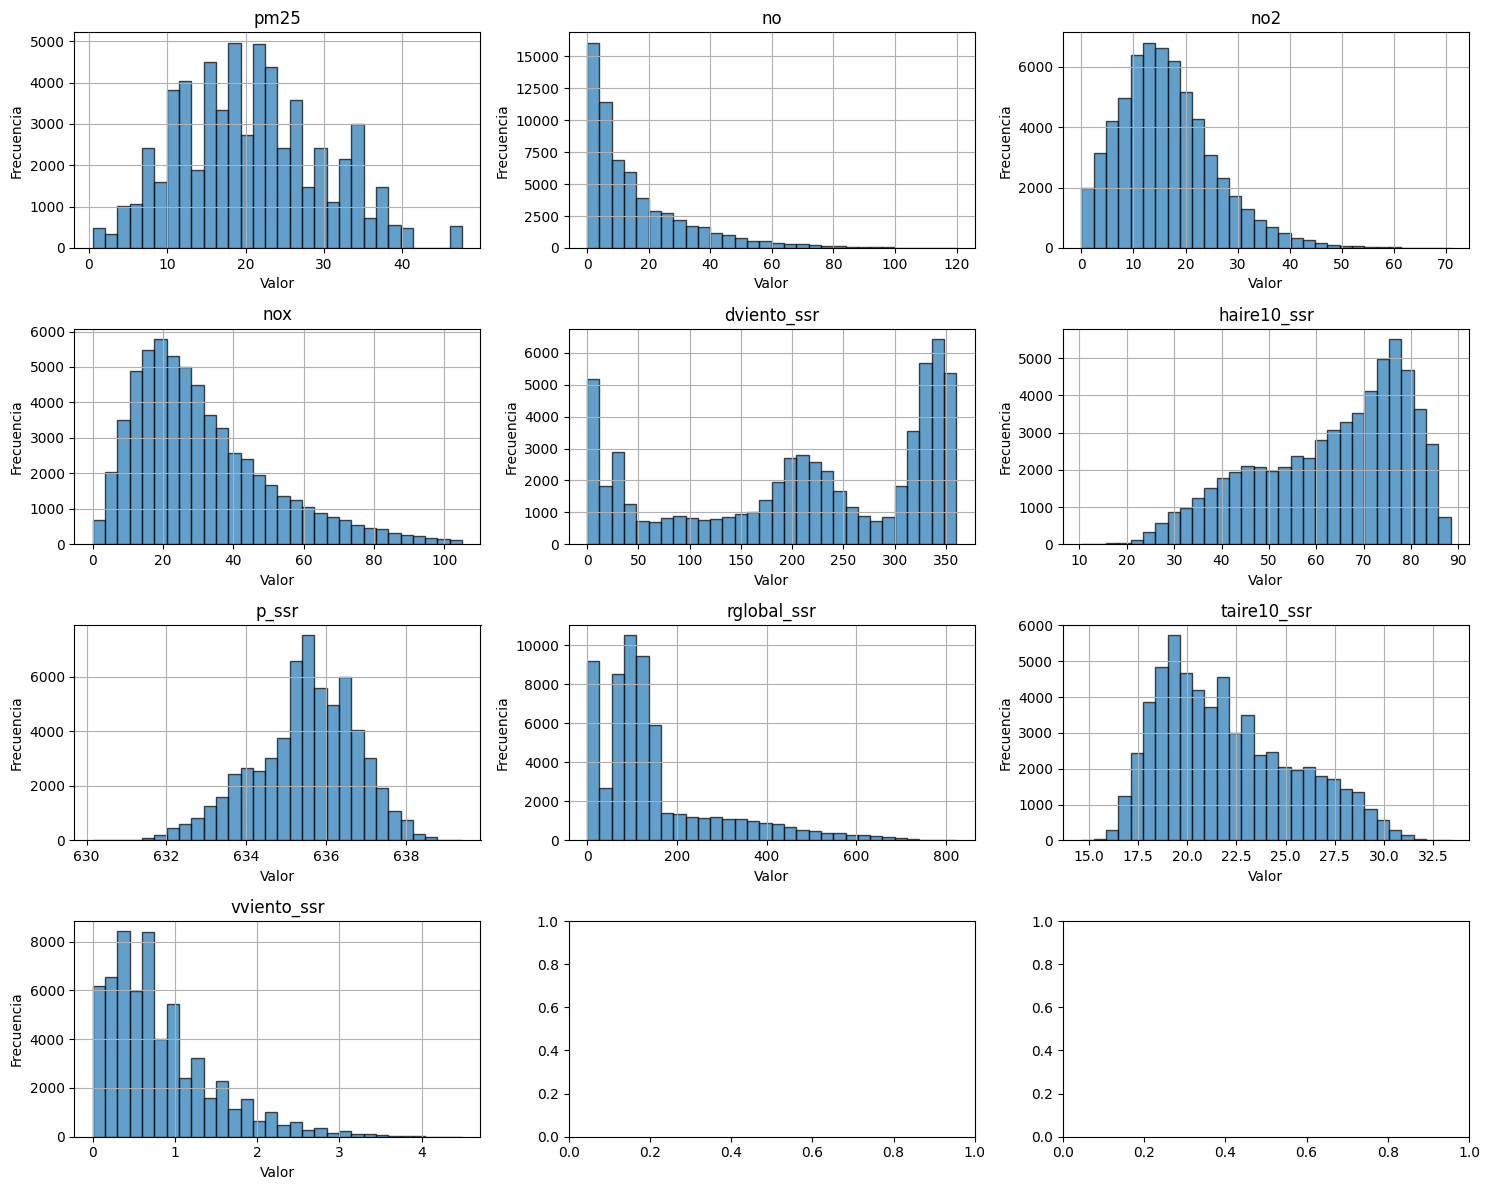

In [301]:
import matplotlib.pyplot as plt

# Definir las columnas que queremos visualizar (excluyendo 'Fecha_Hora' ya que es una fecha)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Crear una figura con subgráficos (ajustar tamaño según cantidad de variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # 4 filas, 3 columnas

# Aplanar la matriz de ejes para iterar sobre ella fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(variables):
    if i < len(variables):  # Evitar errores si hay menos variables que subgráficos
        df_nuevo[col].dropna().astype(float).hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

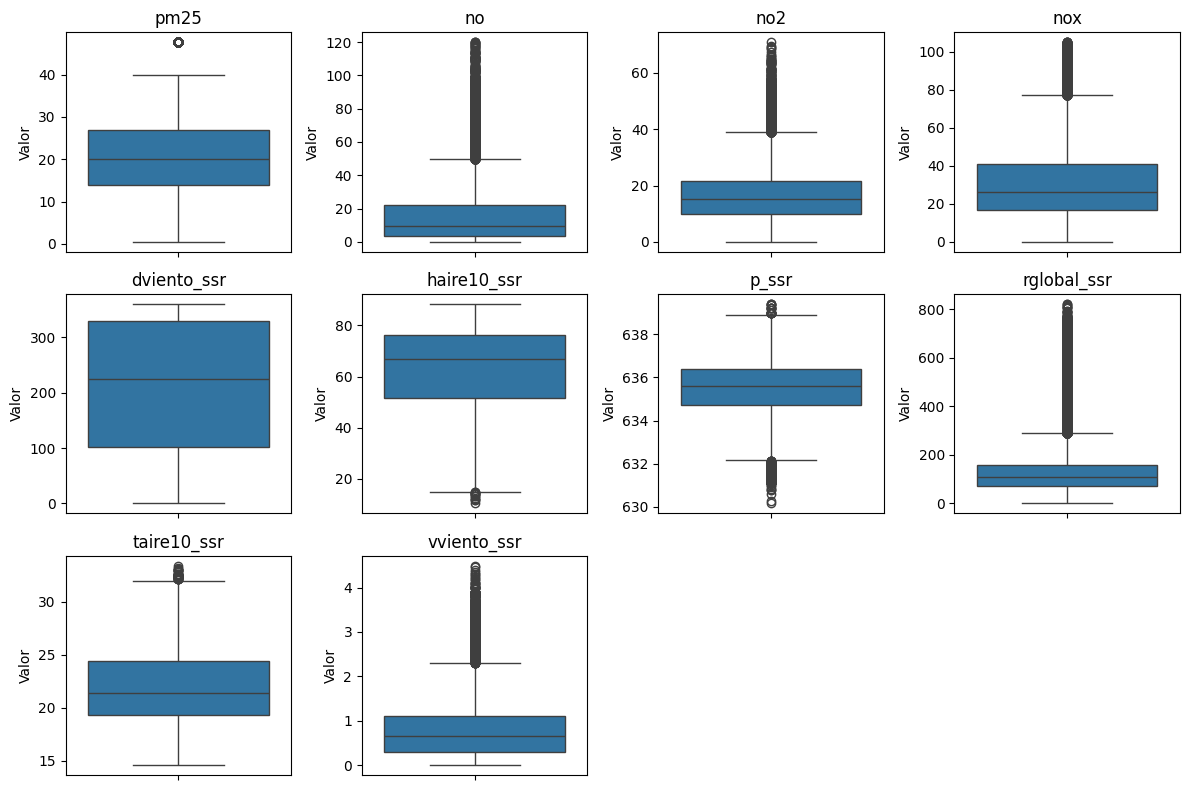

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas (excluyendo Fecha_Hora)
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
             'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Organiza en una cuadrícula
    sns.boxplot(y=df_nuevo[col])  
    plt.title(col)  # Título con el nombre de la variable
    plt.ylabel('Valor')

plt.tight_layout()  # Ajusta el diseño para evitar sobreposición
plt.show()

In [276]:
# Eliminar las columnas auxiliares de Año y Mes si no las necesitas
#df_nuevo.drop(columns=['Año', 'Mes'], inplace=True)

In [277]:
#convertir df_nuevo a csv
# df_nuevo.to_csv('28_nuevo_GO.csv', index=False)

# Análisis de autocorrelaciones

In [278]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [279]:
# Cargar datos desde un archivo CSV
# df = pd.read_csv("28_reducido_imputado_estacional.csv", delimiter=";")

# Eliminar filas con fechas del año 2025
df_nuevo = df_nuevo[df_nuevo["Fecha_Hora"].dt.year != 2025]

In [280]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61368 entries, 0 to 61367
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Hora   61368 non-null  datetime64[ns]
 1   pm25         61368 non-null  float64       
 2   no           61368 non-null  float64       
 3   no2          61368 non-null  float64       
 4   nox          61368 non-null  float64       
 5   dviento_ssr  61368 non-null  float64       
 6   haire10_ssr  61368 non-null  object        
 7   p_ssr        61368 non-null  object        
 8   rglobal_ssr  61368 non-null  object        
 9   taire10_ssr  61368 non-null  object        
 10  vviento_ssr  61368 non-null  object        
 11  Año          61368 non-null  int32         
 12  Mes          61368 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), object(5)
memory usage: 6.1+ MB


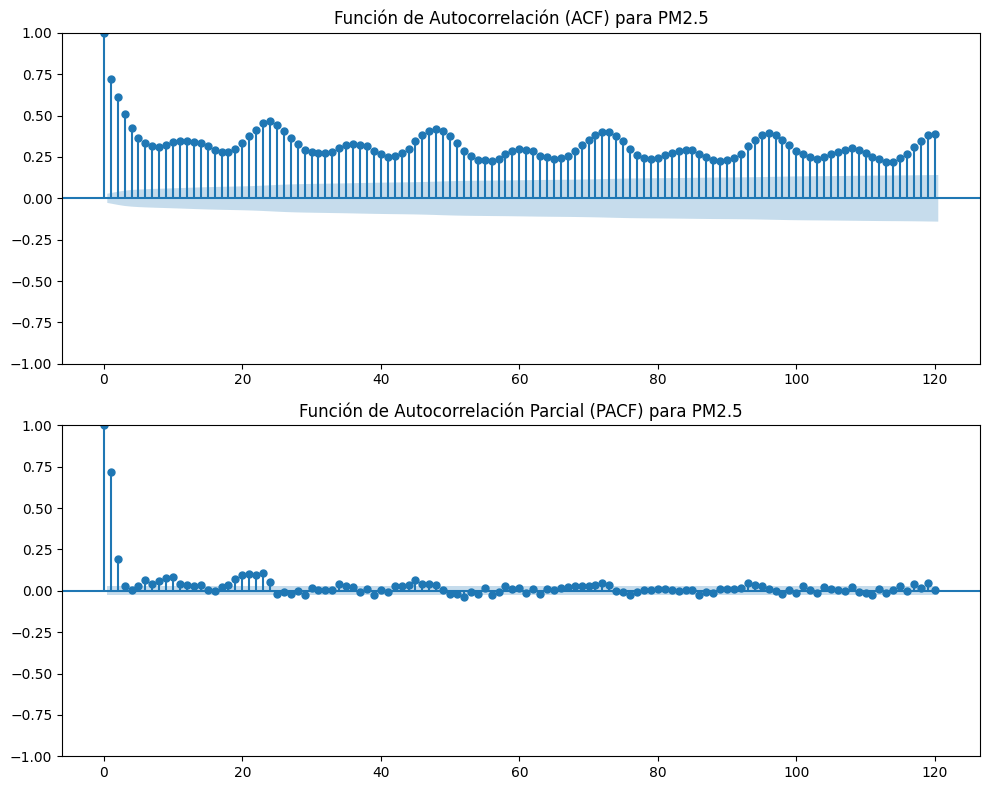

In [281]:
# df_nuevo.set_index("Fecha_Hora", inplace=True)

# Extraer la serie de PM2.5 y eliminar valores nulos
pm25 = df_nuevo["pm25"]

# Reducir la muestra si hay problemas de memoria
pm25_sampled = pm25.iloc[:5000]  # Se puede ajustar según la necesidad

# Generar gráficos de ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de ACF (Autocorrelación)
plot_acf(pm25_sampled, lags=120, ax=ax[0])
ax[0].set_title("Función de Autocorrelación (ACF) para PM2.5")

# Gráfico de PACF (Autocorrelación Parcial)
plot_pacf(pm25_sampled, lags=120, ax=ax[1])
ax[1].set_title("Función de Autocorrelación Parcial (PACF) para PM2.5")

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

In [345]:
from statsmodels.tsa.stattools import acf, pacf

# Seleccionar la variable PM2.5 y reducir la muestra si es necesario
pm25 = df_nuevo["pm25"].dropna().iloc[:5000]  # Se eliminan valores nulos

# Calcular los valores de ACF y PACF
acf_values = acf(pm25, nlags=120, fft=True)  # Autocorrelación
pacf_values = pacf(pm25, nlags=120, method='ywm')  # Autocorrelación parcial

# Mostrar los valores calculados
print("Valores de ACF:", acf_values)
print("\nValores de PACF:", pacf_values)

Valores de ACF: [ 1.00000000e+00  4.97672996e-01  5.08951032e-03  3.85784014e-03
  3.56697495e-03  3.07010563e-03  2.21902700e-03  1.70463106e-03
  5.54292610e-04 -2.61862201e-04  2.28067227e-04  1.03209955e-03
  1.84959782e-03  1.77666179e-03  1.06909677e-03  1.01866644e-04
 -3.79861664e-04 -2.14015879e-04  4.73661798e-04  1.24571122e-03
 -4.57924966e-02 -4.50004181e-02  3.81054547e-03  4.21096070e-03
  4.08931535e-03  3.64704422e-03  3.64135700e-03  3.30717714e-03
  2.69397137e-03  2.53281351e-03  2.32797958e-03  2.12590473e-03
  1.97591734e-03  1.74604841e-03  1.41721614e-03  2.18073033e-03
  3.43888041e-03  2.96079196e-03  2.15718040e-03  2.10839120e-03
  2.29142941e-03  2.69361225e-03  2.80336621e-03  2.66023155e-03
  3.19231116e-03  3.93268362e-03  4.70309355e-03  5.07893313e-03
  4.71776136e-03  4.21900845e-03  3.70573085e-03  3.38287569e-03
  2.95831046e-03  3.19169275e-03  3.18631161e-03  2.82438840e-03
  2.33632758e-03  1.96197129e-03  1.13119393e-03  5.44514926e-04
  6.39094

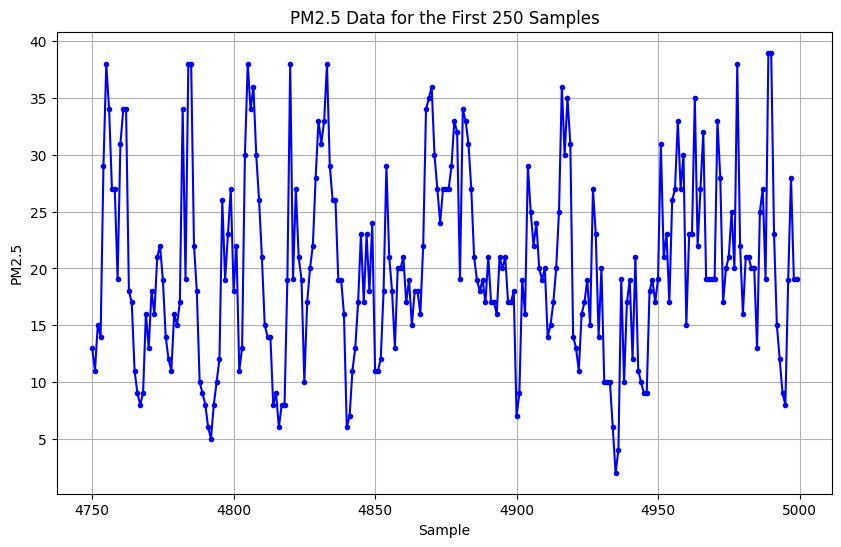

In [350]:
# Plot the PM2.5 data for the first 1000 samples
plt.figure(figsize=(10, 6))
plt.plot(pm25_sampled[-250:], marker='o', markersize=3, linestyle='-', color='b')
plt.title("PM2.5 Data for the First 250 Samples")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

In [283]:
import scipy.stats as stats

In [284]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes'],
      dtype='object')

In [285]:
# Spearman correlation between 'pm25' and the other columns expect 'Año' and 'Mes'
correlations_spearman = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['pm25'], method='spearman')

In [351]:
correlations_spearman

Fecha_Hora    -0.100236
pm25           1.000000
no             0.306759
no2            0.376170
nox            0.450402
dviento_ssr    0.006602
haire10_ssr    0.156191
p_ssr          0.141294
rglobal_ssr   -0.054615
taire10_ssr   -0.183337
vviento_ssr   -0.244983
dtype: float64

In [287]:
correlations_kendall = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['pm25'], method='kendall')
correlations_kendall

Fecha_Hora    -0.066444
pm25           1.000000
no             0.210500
no2            0.259398
nox            0.314485
dviento_ssr    0.003193
haire10_ssr    0.107556
p_ssr          0.096343
rglobal_ssr   -0.036822
taire10_ssr   -0.126331
vviento_ssr   -0.169447
dtype: float64

In [288]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes'],
      dtype='object')

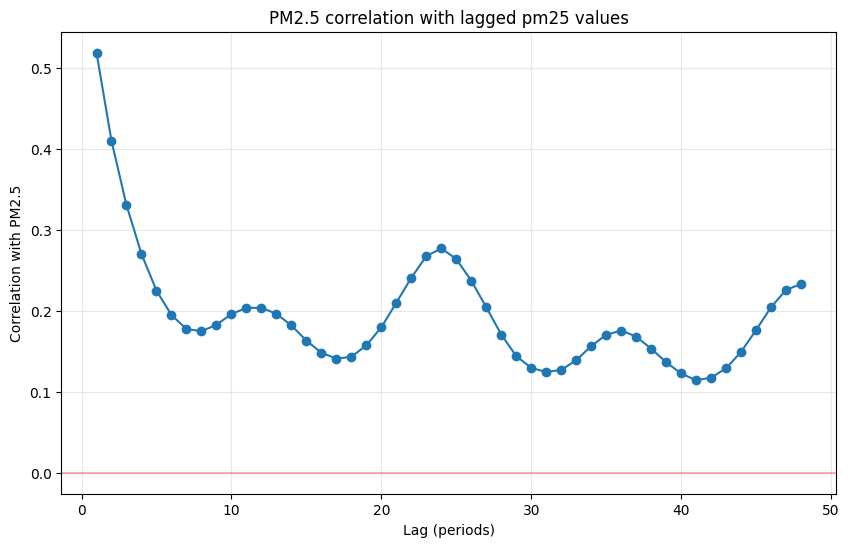

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

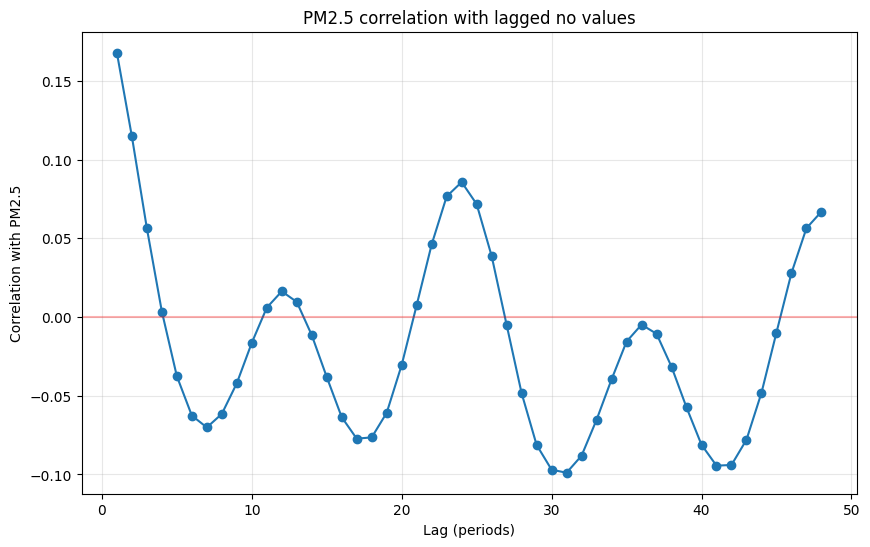

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

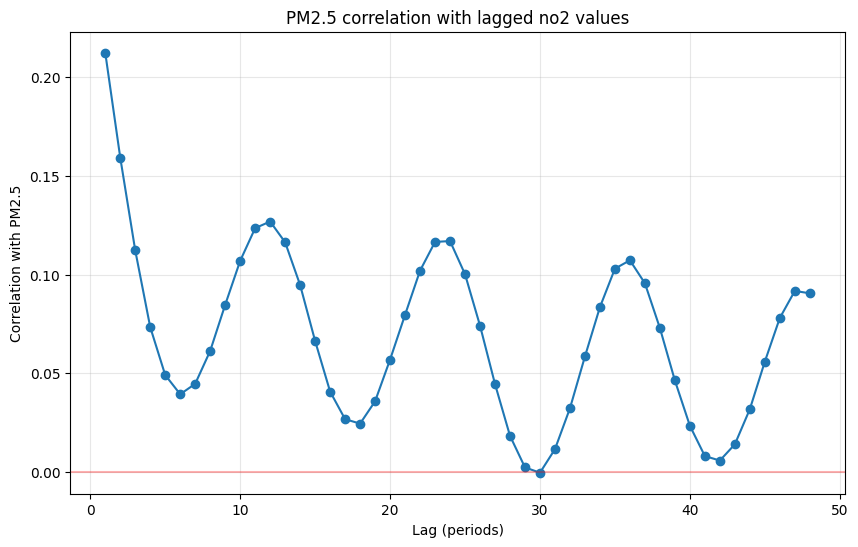

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

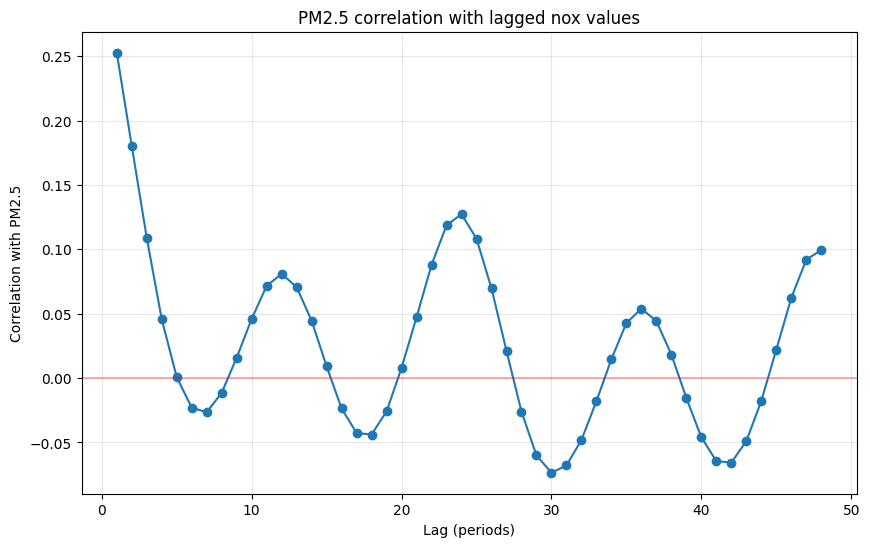

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

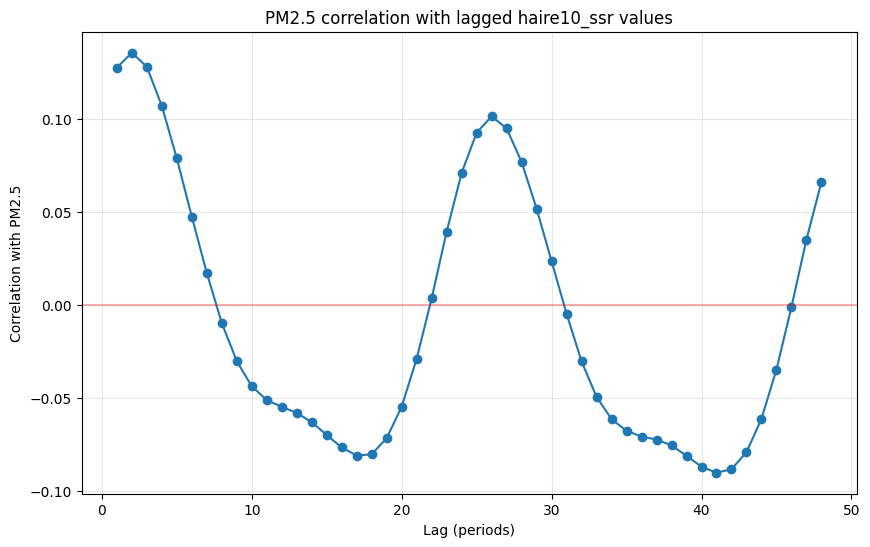

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

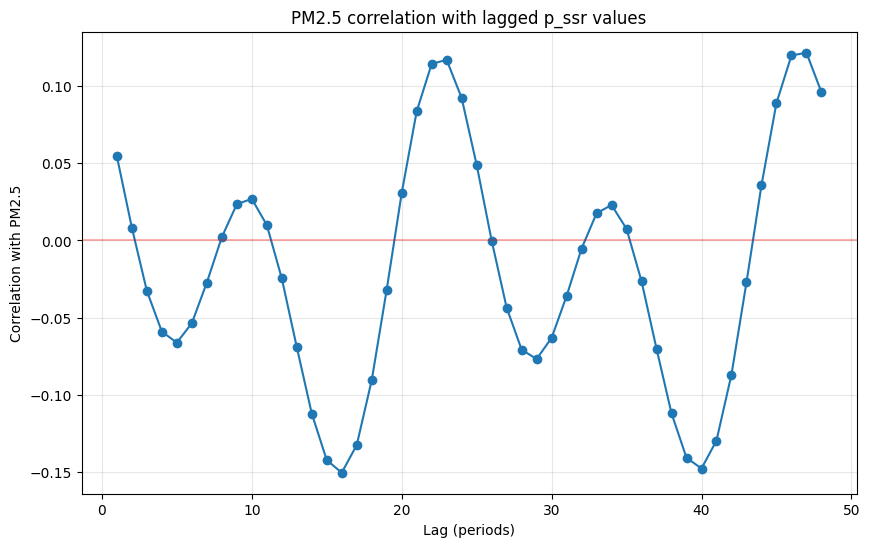

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

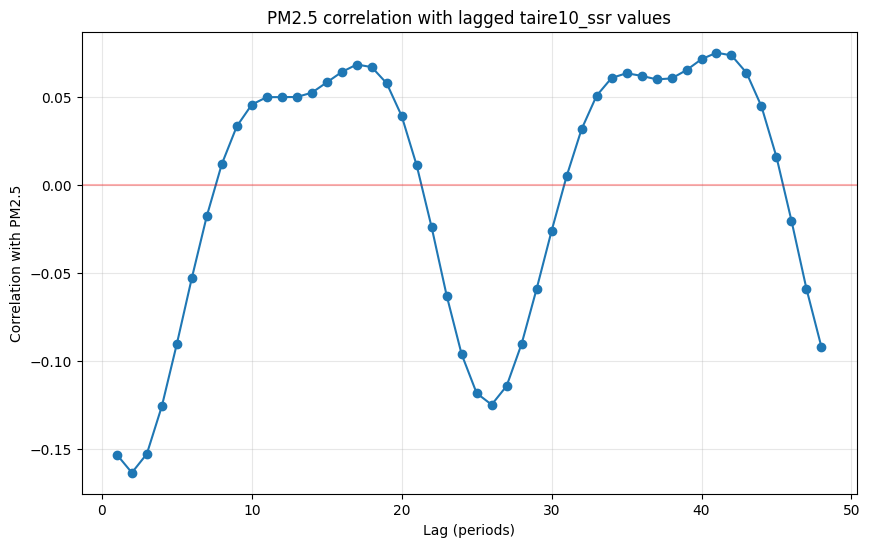

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\4267984278.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

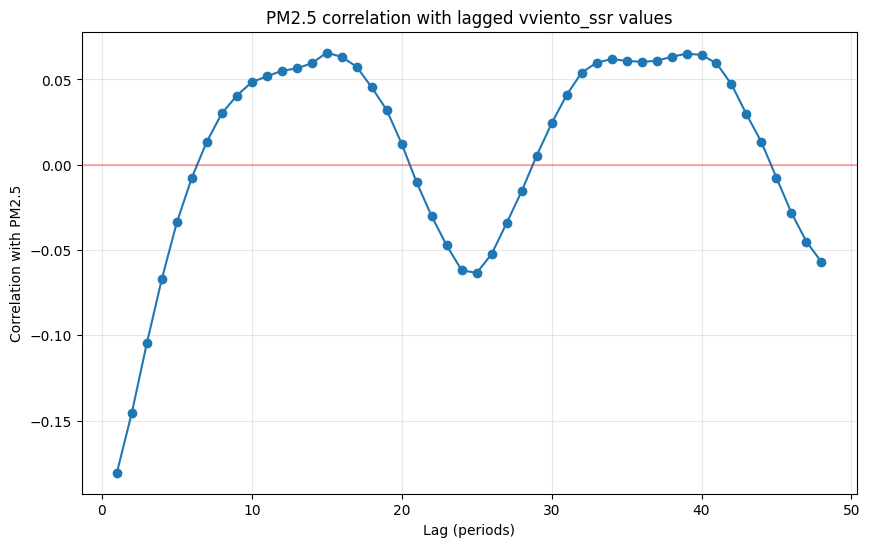

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations for one variable at multiple lags
variables=['pm25','no', 'no2', 'nox', 'haire10_ssr', 'p_ssr',
       'taire10_ssr', 'vviento_ssr']
max_lag = 48  # Maximum lag to consider


for variable in variables:
    lag_correlations = []
    for lag in range(1, max_lag + 1):
        df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
        # Calculate correlation, ignoring NaN values
        corr = df_nuevo['pm25'].corr(df_nuevo[f'{variable}_lag{lag}'], method='kendall')
        lag_correlations.append((lag, corr))

    # Plot the correlations
    lags, corrs = zip(*lag_correlations)
    plt.figure(figsize=(10, 6))
    plt.plot(lags, corrs, marker='o')
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.xlabel('Lag (periods)')
    plt.ylabel(f'Correlation with PM2.5')
    plt.title(f'PM2.5 correlation with lagged {variable} values')
    plt.grid(True, alpha=0.3)
    plt.show()

# Clean up the lagged columns
df_nuevo.drop(columns=[f'{variable}_lag{lag}' for variable in variables for lag in range(1, max_lag + 1)], inplace=True)

C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3821417561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3821417561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\orreg\AppData\Local\Temp\ipykernel_12120\3821417561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

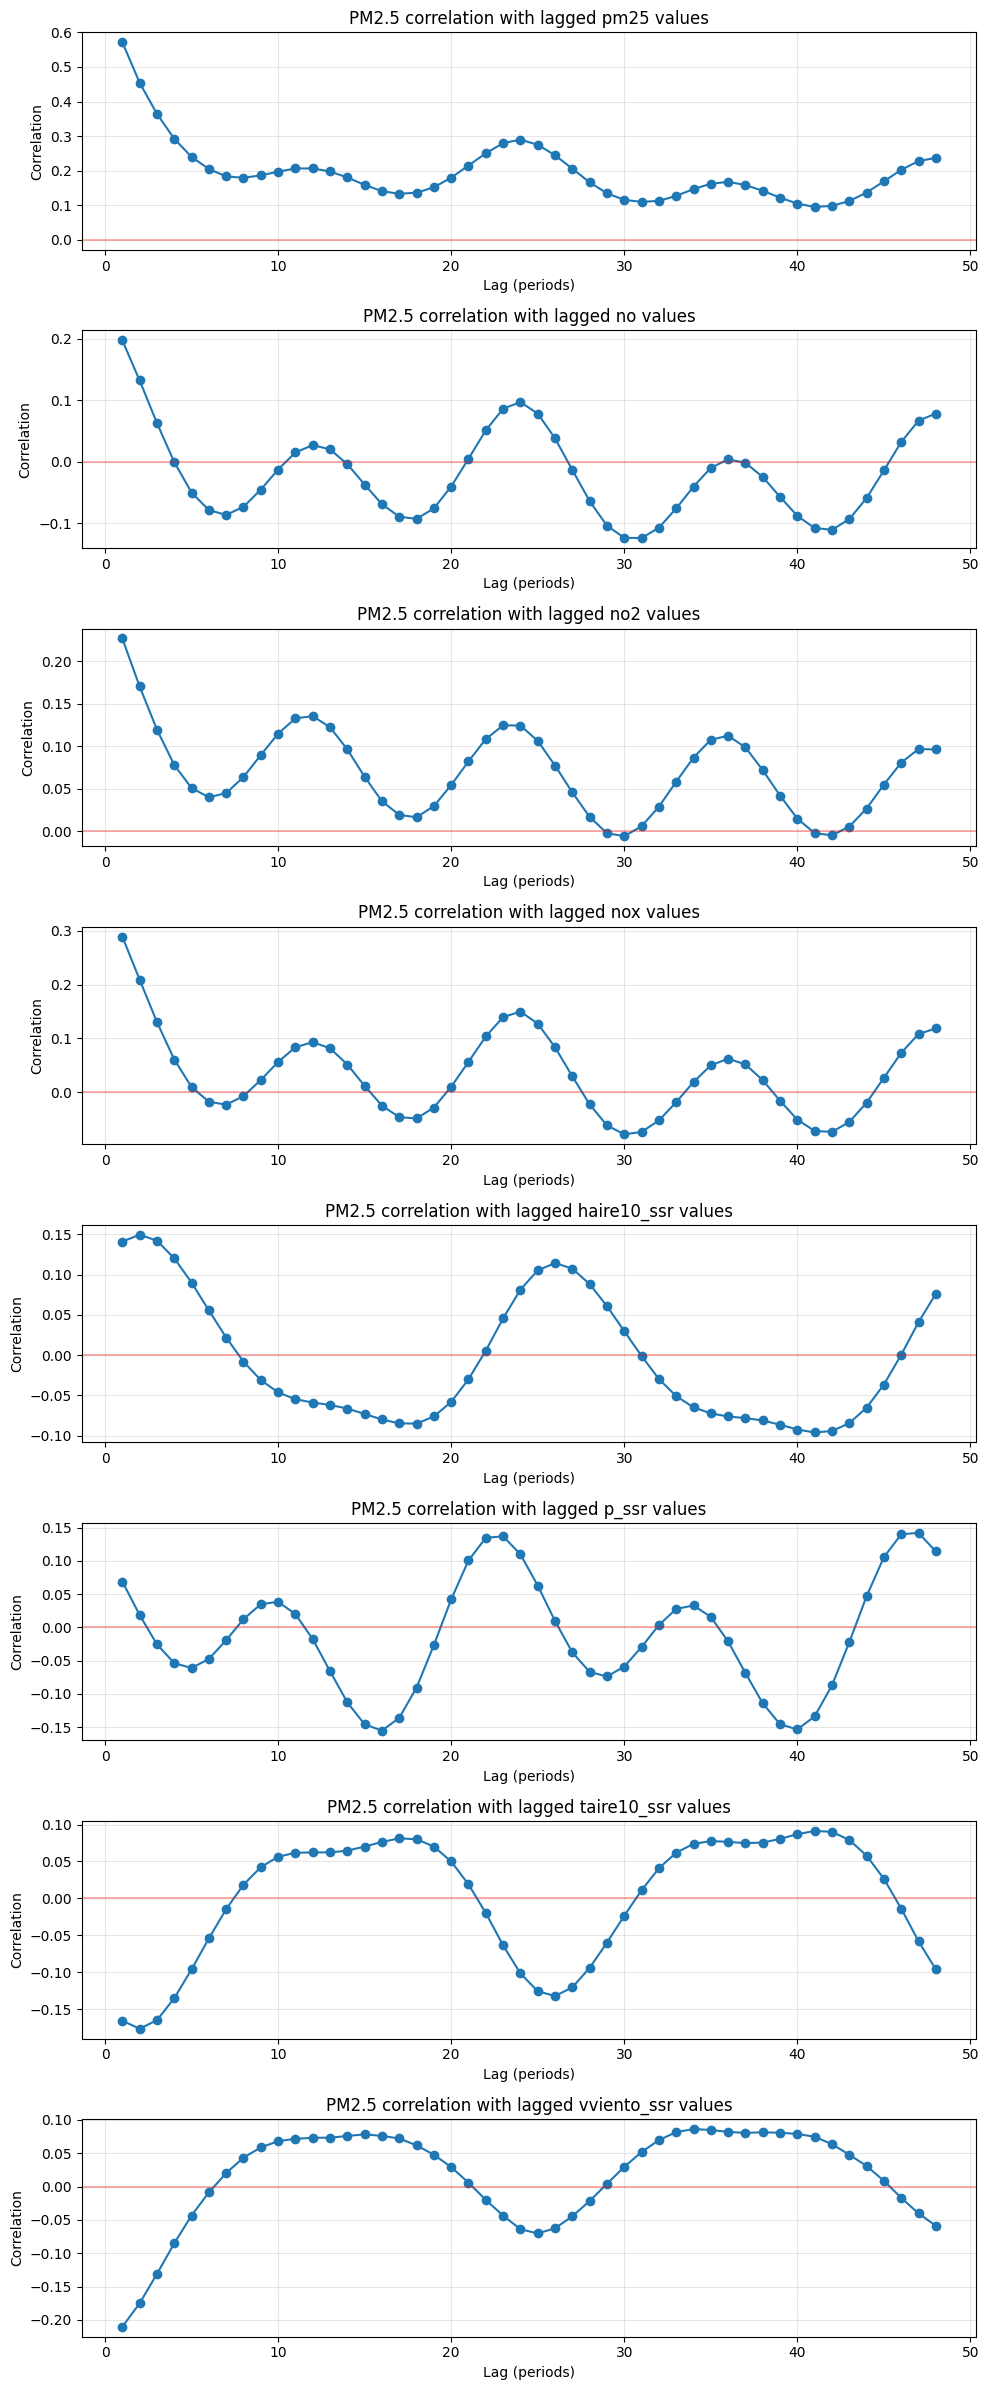

In [352]:
import matplotlib.pyplot as plt
import pandas as pd

variables = ['pm25', 'no', 'no2', 'nox', 'haire10_ssr', 'p_ssr',
             'taire10_ssr', 'vviento_ssr']
max_lag = 48  # Maximum lag to consider

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 3 * len(variables)))

for i, variable in enumerate(variables):
    lag_correlations = []
    for lag in range(1, max_lag + 1):
        df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
        # Calculate correlation, ignoring NaN values
        corr = df_nuevo['pm25'].corr(df_nuevo[f'{variable}_lag{lag}'], method='kendall')
        lag_correlations.append((lag, corr))
    
    # Plot in the corresponding subplot
    lags, corrs = zip(*lag_correlations)
    axes[i].plot(lags, corrs, marker='o')
    axes[i].axhline(y=0, color='r', linestyle='-', alpha=0.3)
    axes[i].set_xlabel('Lag (periods)')
    axes[i].set_ylabel('Correlation')
    axes[i].set_title(f'PM2.5 correlation with lagged {variable} values')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [290]:
# Lista de columnas que quieres expandir con valores anteriores
variables = ['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr', 
             'rglobal_ssr', 'taire10_ssr', 'vviento_ssr']

# Agregar 6 columnas para cada variable con valores de registros anteriores
for var in variables:
    for i in [1,2,3,4,5,6,12,24]:  # 1 hasta 6 registros anteriores
        df_nuevo[f'{var}_lag{i}'] = df_nuevo[var].shift(i)

# Ver las primeras filas del dataframe con las nuevas columnas
print(df.head())

            Fecha_Hora  pm25 calidad_pm25       no calidad_no      no2  \
0  2018-01-01 00:00:00  42.0          1.0  22.8438        1.0  16.5963   
1  2018-01-01 01:00:00  38.0          1.0   2.6975        1.0  13.4904   
2  2018-01-01 02:00:00  53.0          1.0  4.72986        1.0  15.2611   
3  2018-01-01 03:00:00  38.0          1.0  3.08167        1.0  13.7399   
4  2018-01-01 04:00:00  47.0          1.0  5.62889        1.0  15.2401   

  calidad_no2      nox calidad_nox dviento_ssr  ... haire10_ssr  \
0         1.0  39.4463         1.0     6.92989  ...     74.9315   
1         1.0   16.189         1.0     323.503  ...     77.5025   
2         1.0  19.9911         1.0     331.834  ...     78.9618   
3         1.0  16.8242         1.0     324.642  ...     79.5796   
4         1.0  20.8768         1.0     1.63179  ...     79.2826   

  calidad_haire10_ssr    p_ssr calidad_p_ssr rglobal_ssr calidad_rglobal_ssr  \
0                 1.0  637.431           1.0         0.0                

In [291]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'Año', 'Mes',
       'pm25_lag1', 'pm25_lag2', 'pm25_lag3', 'pm25_lag4', 'pm25_lag5',
       'pm25_lag6', 'pm25_lag12', 'pm25_lag24', 'no_lag1', 'no_lag2',
       'no_lag3', 'no_lag4', 'no_lag5', 'no_lag6', 'no_lag12', 'no_lag24',
       'no2_lag1', 'no2_lag2', 'no2_lag3', 'no2_lag4', 'no2_lag5', 'no2_lag6',
       'no2_lag12', 'no2_lag24', 'nox_lag1', 'nox_lag2', 'nox_lag3',
       'nox_lag4', 'nox_lag5', 'nox_lag6', 'nox_lag12', 'nox_lag24',
       'dviento_ssr_lag1', 'dviento_ssr_lag2', 'dviento_ssr_lag3',
       'dviento_ssr_lag4', 'dviento_ssr_lag5', 'dviento_ssr_lag6',
       'dviento_ssr_lag12', 'dviento_ssr_lag24', 'haire10_ssr_lag1',
       'haire10_ssr_lag2', 'haire10_ssr_lag3', 'haire10_ssr_lag4',
       'haire10_ssr_lag5', 'haire10_ssr_lag6', 'haire10_ssr_lag12',
       'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag2', 'p_ssr_lag3',
    

In [292]:
features = [
    'pm25',
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]

In [293]:
df_nuevo[features].describe()

,pm25,no,no2,nox,dviento_ssr
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,20.629437,15.852902,16.378801,31.093173,212.271839
std,9.164718,16.916051,9.207204,19.555127,120.928921
min,0.500000,0.000694,0.000900,0.007500,0.000000
25%,14.000000,3.799485,9.864325,16.713225,111.577500
50%,20.000000,9.713706,15.363600,26.545650,227.000000
75%,27.000000,22.354025,21.520900,41.030825,329.000000
max,47.638028,119.885000,70.855400,104.991000,360.000000


In [294]:
df_nuevo.drop(['Año', 'Mes'],inplace=True, axis=1)

In [295]:
# df_nuevo.to_csv('28_nuevo_rezagado.csv', index=False)

In [ ]:
df_nuevo.to_csv('28_datos_modelos.csv', index=False)

In [298]:
# Verificar valores NaN
print("Valores NaN en X_train:\n", df_nuevo.isna().sum())

# Verificar valores infinitos
#print("¿Hay valores infinitos en X_train?", df_nuevo.isinf(df_nuevo).sum().sum())

Valores NaN en X_train:
 Fecha_Hora            0
pm25                  0
no                    0
no2                   0
nox                   0
                     ..
vviento_ssr_lag4      0
vviento_ssr_lag5      0
vviento_ssr_lag6      1
vviento_ssr_lag12     7
vviento_ssr_lag24    19
Length: 91, dtype: int64
